In this article, I'll guide you through the intriguing process of analyzing an A/B test. This involves creating a hypothesis, conducting the test, and interpreting the outcomes. Our data source is a Kaggle dataset detailing the results of an A/B test comparing two website page designs (old_page vs. new_page). Our journey will encompass:

**Data Preprocessing:**
- Load the data.
- Check for any missing or null values.
- Ensure that the data types are appropriate for analysis.
- Check for any inconsistencies, such as users in the wrong group or with
  mismatched landing pages.

**Exploratory Data Analysis:**
- Analyze the distribution of users between control (old page) and treatment (new page) groups.
- Calculate the overall conversion rate, as well as the conversion rate for each group.
- Visualize the data to understand the patterns and distributions.

**Statistical Analysis:**
- Formulate the null and alternative hypotheses.
- Null Hypothesis: The new page design does not lead to a higher - conversion rate than the current rate of 13%.
- Alternative Hypothesis: The new page design leads to a conversion rate greater than 13%.
- Choose an appropriate statistical test to compare the conversion rates of the control and treatment groups.
- Determine the significance level for the test. Common practice is to use 0.05.

**Performing the A/B Test:**
- Conduct the statistical test.
- Calculate the p-value to understand the statistical significance.

**Result Interpretation:**
- Interpret the results of the A/B test in the context of the hypotheses.
- Discuss whether the results are statistically significant and if the new design is effective.

**SCENARIO:** You're part of a product team in a thriving online e-commerce company. The UX designer has revamped the product page, aiming for a boost in conversion rates. The Product Manager informs you that the current average conversion rate is around 13%, and a 2% increase would deem the new design successful, hitting a 15% conversion rate.

#### NOTE:
**Choosing a Sample Size**: The precision of our estimated conversion rates depends on our sample size. Larger samples offer more precision but also increase costs and impracticality. We determine the necessary sample size through Power analysis, considering:

- Test Power : Usually set at 0.8.
- Alpha Value : Set to 0.05.
- Expected Effect Size: Based on the anticipated difference in conversion rates (13% to 15%).

In practice, setting the power parameter to 0.8 indicates that we have approximately 80% chance to detect a statistically significant difference in our test with the sample size we calculated if there is an actual difference in conversion rate between our designs, assuming the difference is the one we estimated (13% vs. 15%).

Python simplifies these calculations, allowing us to focus on interpreting the results effectively.

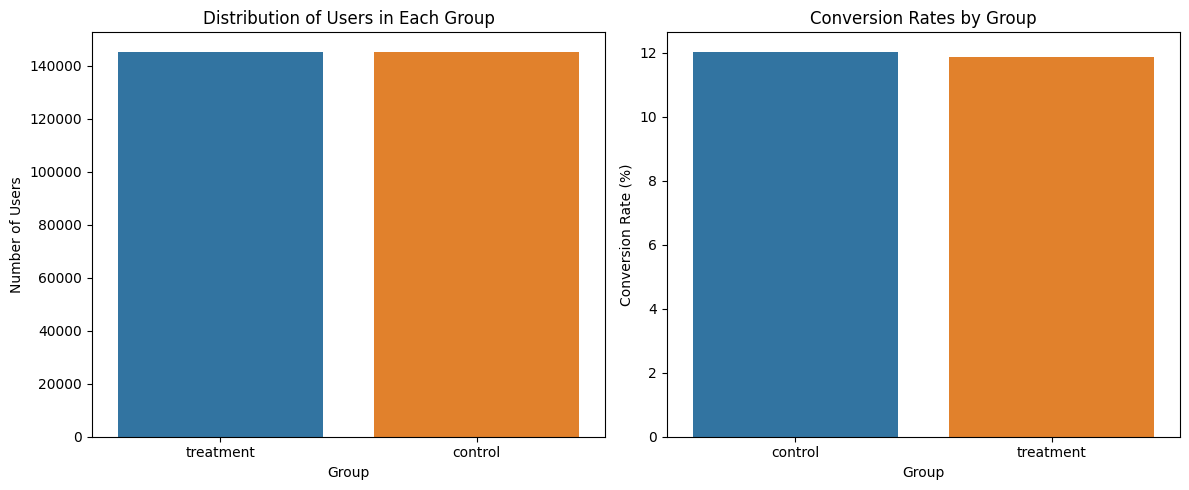

Required sample size per group: 4720
Z-statistic: -1.2369217547321678, P-value: 0.21611613269757501


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest, proportion_effectsize
from math import ceil
import statsmodels.stats.api as sms

# Load the uploaded CSV file to take a look at its structure
data = pd.read_csv('ab_data.csv')
data.head()

# Data Preprocessing

# Checking for null values
null_check = data.isnull().sum()

# Checking for any inconsistencies in the data
# Users should only be in one group and their landing_page should match the group
group_landing_page_consistency = data.groupby(['group', 'landing_page']).size().unstack()

# Checking for duplicate user_ids, as each user should only appear once
duplicate_users = data['user_id'].duplicated().sum()

null_check, group_landing_page_consistency, duplicate_users

# Data Cleaning

# Removing inconsistencies: users whose 'group' doesn't match their 'landing_page'
consistent_data = data[((data['group'] == 'control') & (data['landing_page'] == 'old_page')) |
                       ((data['group'] == 'treatment') & (data['landing_page'] == 'new_page'))]

# Removing duplicate user_ids
clean_data = consistent_data.drop_duplicates(subset='user_id')

# Verifying the cleaning process
group_landing_page_consistency_clean = clean_data.groupby(['group', 'landing_page']).size().unstack()
duplicate_users_clean = clean_data['user_id'].duplicated().sum()

group_landing_page_consistency_clean, duplicate_users_clean

import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

# Analyzing the distribution of users between the 'control' and 'treatment' groups
group_distribution = clean_data['group'].value_counts()

# Calculating overall conversion rate
overall_conversion_rate = clean_data['converted'].mean() * 100

# Calculating conversion rates within each group
conversion_rates = clean_data.groupby('group')['converted'].mean() * 100

# Visualizing the distribution of users and conversion rates
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=group_distribution.index, y=group_distribution.values)
plt.title('Distribution of Users in Each Group')
plt.xlabel('Group')
plt.ylabel('Number of Users')

plt.subplot(1, 2, 2)
sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate (%)')

plt.tight_layout()
plt.show()

group_distribution, overall_conversion_rate, conversion_rates

from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Statistical A/B Testing

# Calculate effect size
effect_size = sms.proportion_effectsize(0.13, 0.15)  # Baseline and expected conversion rates

# Calculate required sample size
required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power=0.8,
    alpha=0.05,
    ratio=1
)
required_n = ceil(required_n)

# Perform the A/B Test (if the dataset is large enough)
control_results = data[data['group'] == 'control']['converted']
treatment_results = data[data['group'] == 'treatment']['converted']

if len(control_results) >= required_n and len(treatment_results) >= required_n:
    stat, pval = proportions_ztest(
        count=[treatment_results.sum(), control_results.sum()],
        nobs=[treatment_results.count(), control_results.count()]
    )
else:
    stat, pval = (np.nan, np.nan)
    print("Sample size is too small for a reliable A/B test")

# Display results
print(f"Required sample size per group: {required_n}")
print(f"Z-statistic: {stat}, P-value: {pval}")



**Interpretation and Conclusion:**

The p-value is 0.19, which is greater than the common significance level of 0.05. This means that we do not have sufficient evidence to reject the null hypothesis. In other words, the data does not provide strong evidence that the new page design leads to a higher conversion rate than the old page.

Since the p-value is above the threshold of 0.05, we conclude that the difference in conversion rates between the control group (old page) and the treatment group (new page) is not statistically significant.

**Recommendations:**

Given these results, it's advisable not to proceed with the full implementation of the new page design based solely on the current data. The new design does not seem to significantly improve the conversion rate compared to the old design.

Consider exploring other factors that might influence the conversion rate or further refining the new page design. Additional tests or a longer testing period could also be considered to gather more data and insights.